# Počítačový návrh léčiv - 3. cvičení 

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys

In [2]:
suppl = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in suppl if m]

In [3]:
substructures = {
    'carboxyl' : Chem.MolFromSmarts('C(=O)O'),
    'benzene' : Chem.MolFromSmarts('c1ccccc1'),
    'aldehyde' : Chem.MolFromSmarts('[CX3H1](=O)[#6]'),
    'amide' : Chem.MolFromSmarts('[NX3][CX3](=[OX1])[#6]'),
    'ketone' : Chem.MolFromSmarts('[#6][CX3](=O)[#6] '),
    'halogene' : Chem.MolFromSmarts('[F;Cl;Br;I]'),
    'hydroxyl' : Chem.MolFromSmarts('[OX2H]'),
    #'inorganic' : Chem.MolFromSmarts('![[#1];![#6];![#7];![#8];![16];!F;!Cl;!Br;!I]')
}

pattern_names = tuple(substructures.keys())
pattern_names

('carboxyl', 'benzene', 'aldehyde', 'amide', 'ketone', 'halogene', 'hydroxyl')

In [4]:
# funkce, která vrací n-tici bool hodnot odpovídající přítomnosti patternu popsaném ve slovníku pattern_dict
# in -> m: molekula, pro kterou chci generovat klíč
# in -> name_order: n-tice jmen patternů, vytáhnutá ze slovníku.. zde ('carboxyl', 'benzene', 'aldehyde...)
# in pattern_dict: slovník o struktuře {jmeno_patternu\string\:Chem.MolFromSmarts('pattern pomocí smarts\string\)')}
def apply_substr_key(m, name_order, pattern_dict):
    return tuple((m.HasSubstructMatch(pattern_dict[name]) for name in name_order))

In [5]:
substructures.items()

dict_items([('carboxyl', <rdkit.Chem.rdchem.Mol object at 0x7f2826796da0>), ('benzene', <rdkit.Chem.rdchem.Mol object at 0x7f2826796e40>), ('aldehyde', <rdkit.Chem.rdchem.Mol object at 0x7f2826796e90>), ('amide', <rdkit.Chem.rdchem.Mol object at 0x7f2826796ee0>), ('ketone', <rdkit.Chem.rdchem.Mol object at 0x7f2826796f30>), ('halogene', <rdkit.Chem.rdchem.Mol object at 0x7f2826796f80>), ('hydroxyl', <rdkit.Chem.rdchem.Mol object at 0x7f282679f030>)])

In [6]:
# vyhledání klíče pro jednu konkrétní molekulu pomocí fce apply_substr_key
apply_substr_key(drugbank[123], pattern_names, substructures)


(True, True, False, False, False, False, True)

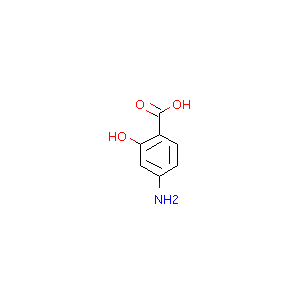

In [7]:
Draw.MolToImage(drugbank[123])

In [8]:
# zde to samé, pro všechny molekuly drugbanku
custom_struct_keys = [apply_substr_key(i, pattern_names, substructures) for i in drugbank]
len(custom_struct_keys)

7110

In [9]:
custom_struct_keys[:10]

[(True, True, False, True, False, False, True),
 (False, True, False, True, False, False, True),
 (False, True, False, True, False, False, True),
 (False, True, False, True, False, False, True),
 (False, False, False, True, False, False, True),
 (False, True, False, True, False, False, False),
 (False, True, False, True, False, False, True),
 (False, False, True, False, False, False, True),
 (False, True, False, True, False, False, True),
 (True, True, False, True, False, False, True)]

In [10]:
# vypsání četnosti jednotlivých patternů
counts = list(map(sum, zip(*custom_struct_keys)))
for i, j in zip(counts, pattern_names):
    print(j, i)


carboxyl 2397
benzene 4286
aldehyde 112
amide 2058
ketone 653
halogene 0
hydroxyl 4279


(True, True, False, False, False, False, True)


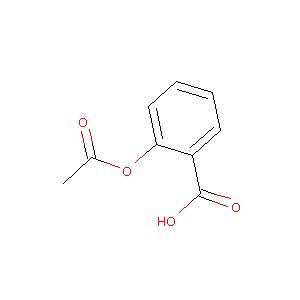

In [11]:
# vygenerování klíče pro aspirin
aspirin = Chem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
aspirin_key = apply_substr_key(aspirin, pattern_names, substructures)
print(aspirin_key)
Draw.MolToImage(aspirin)

In [12]:
aspirin_key_hits = [i for i, key in enumerate(custom_struct_keys) if key == aspirin_key]

In [13]:
hits = ([drugbank[i] for i in aspirin_key_hits])
len(hits)

570

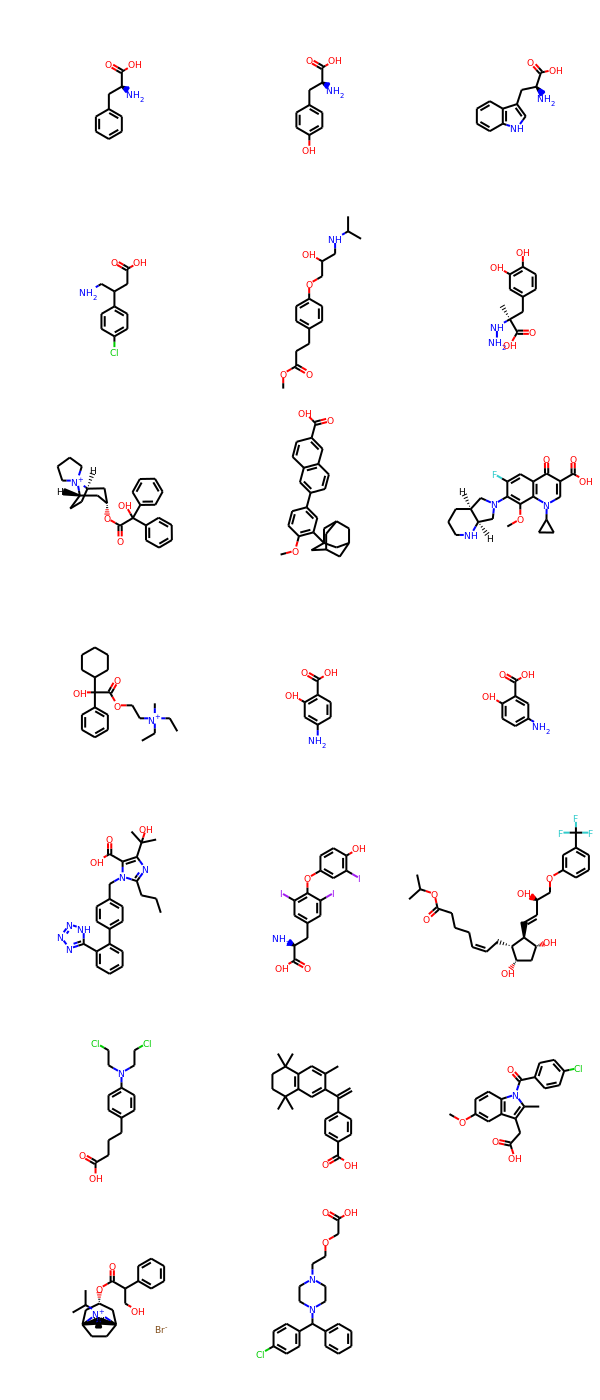

In [25]:
obrazek = Draw.MolsToGridImage(hits[0:20], molsPerRow = 3)
obrazek


In [26]:
# mám nějakou query, v tomto případě třeba ten aspirin. Na ten aplikuju to vyhledání klíče podle definovanejch pravidel.
# tohle jsme zároveň udělali už pro všechny látky v drugbanku a tak teď můžu už jen projíždět
# ty n-tice jako (T, F, T, T...) a porovnávat je s tou n-ticí která odpovídá aspirinu. 

# tato funkce frací True, pouze pokud najde látku která má True všude tam, kde ho má Aspirin. 
def potential_superstructure(super_key, query_key):
    for s, q in zip(super_key, query_key):
        if q and not s:
            return False
    return True

In [16]:
aspirin_potentioal_superstructures = [i for i, key in enumerate(custom_struct_keys)
                                      if potential_superstructure(key, aspirin_key)]
len(aspirin_potentioal_superstructures)


1068

In [17]:
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugbank]
list(drugbank_maccs[666].GetOnBits())

[30,
 49,
 57,
 74,
 85,
 86,
 93,
 95,
 98,
 100,
 101,
 105,
 108,
 109,
 111,
 112,
 113,
 115,
 116,
 118,
 122,
 123,
 125,
 126,
 132,
 137,
 138,
 141,
 144,
 145,
 146,
 147,
 148,
 149,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165]

In [18]:
aspirin_maccs = MACCSkeys.GenMACCSKeys(aspirin)
tuple(aspirin_maccs.GetOnBits())


(89,
 113,
 123,
 126,
 127,
 136,
 139,
 140,
 143,
 144,
 146,
 150,
 152,
 154,
 157,
 159,
 160,
 162,
 163,
 164,
 165)

In [19]:
aspirin_maccs_hits = [i for i, key in enumerate(drugbank_maccs) if key == aspirin_maccs]
aspirin_maccs_hits

[824]

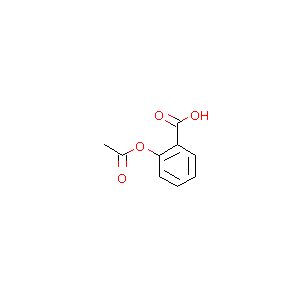

In [20]:
Draw.MolToImage(drugbank[824])

In [21]:
#vůbec ne překvapivě je ten jeden hit opět aspirin

In [22]:
#díváme se který bity má zapnutý ta query struktura. Pak procházíme superstruktury a když je jeden z těch
#co jsou v query zaplý vyplý, tak je to pro nás blbá struktura a ignorujem jí.

def potential_maccs_superstructure(super_key, query_key):
    for on_bit in query_key.GetOnBits(): 
        if super_key.GetBit(on_bit):
            return False
    return True

In [23]:
list(drugbank_maccs[0].GetOnBits())

[25,
 43,
 53,
 54,
 74,
 75,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 90,
 91,
 92,
 95,
 96,
 97,
 100,
 104,
 106,
 110,
 111,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 125,
 127,
 128,
 129,
 131,
 132,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165]

In [24]:
aspirin_potential_maccs_superstructures = [i for i, key, in enumerate(drugbank_maccs)
                                          if potential_maccs_superstructure(key, aspirin_maccs)]

len(aspirin_potential_maccs_superstructures)

60